IMPORTING LIBRARIES

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

LOADING DATASET

The training dataset consists of 60000 28x28 pixel images of hand written digits from 0 to 9.


The test dataset consists of 10000 28x28 pixel images.

In [3]:
mnist_dataset = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist_dataset.load_data()

In [4]:
print('x_train:', x_train.shape )
print('y_train:', y_train.shape )
print('x_test:', x_test.shape )
print('x_test:', y_test.shape )

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
x_test: (10000,)


In [5]:
#saving image parameters to constants to use for later data reshaping and model training
(IMAGE_WIDTH, IMAGE_HEIGHT) = (x_train.shape[1],x_train.shape[-1])
IMAGE_CHANNELS = 1 #It is a grey scale image which contains only one channel
print('IMAGE_WIDTH:',IMAGE_WIDTH)
print('IMAGE_HEIGHT:',IMAGE_HEIGHT)
print('IMAGE_CHANNELS:',IMAGE_CHANNELS)

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


EXPLORE THE DATA

Each image in the dataset looks like 28x28 matrix of integers(values ranging from 0 to 255). Each integer represents a colour of pixel

In [6]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


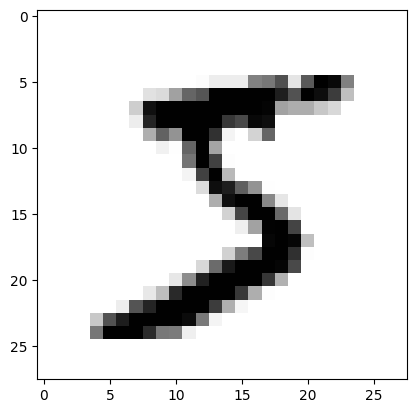

In [7]:
#Matrix of numbers may be drawn as follows
plt.imshow(x_train[0], cmap = plt.cm.binary)  # Setting colour map to display the image in binary colors(black and white)
plt.show()

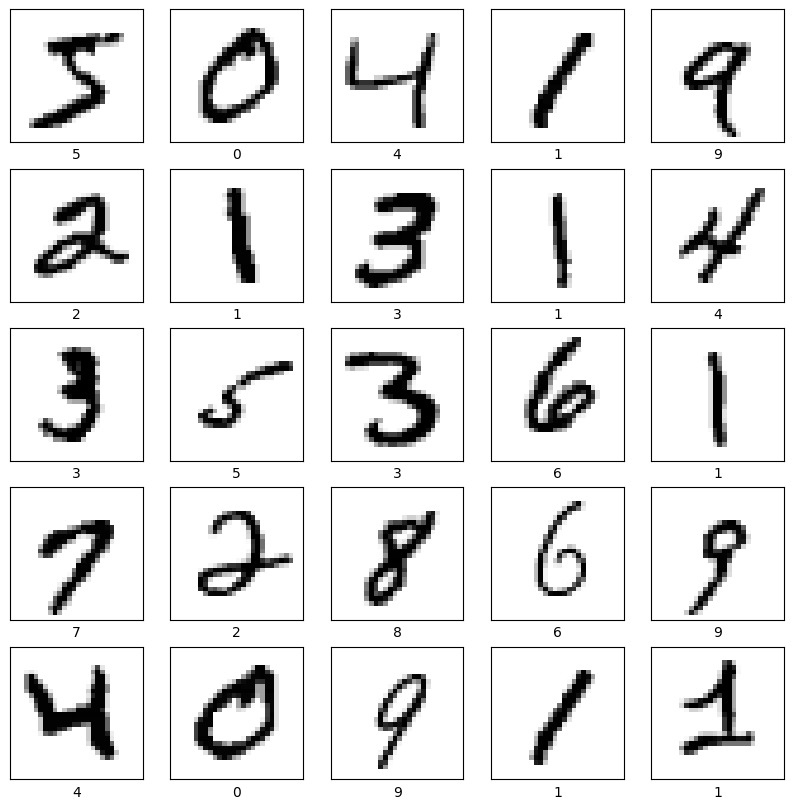

In [8]:
#lets print some more training examples.
number_of_displays = 25
num_cells = math.ceil(math.sqrt(number_of_displays))  # To calculate the number of cells required to display all the items in a grid layout
plt.figure(figsize = (10,10)) # Setting figure size
for i in range(number_of_displays):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])   #Removing the x axis tick marks from subplot to create cleaner appearence
    plt.yticks([])   #Removing the y axis tick marks from subplot to create cleaner appearence
    plt.grid(False)  #Disabling grid lines in the subplot for a cleaner look
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

RESHAPING THE DATA

In [9]:
#Adding channels to the data to use convolution layers(as each image is grey scale with one channel)
x_train_with_channels = x_train.reshape(
x_train.shape[0],
IMAGE_WIDTH,
IMAGE_HEIGHT,
IMAGE_CHANNELS
)

x_test_with_channels = x_test.reshape(
x_test.shape[0],
IMAGE_WIDTH,
IMAGE_HEIGHT,
IMAGE_CHANNELS
)

In [10]:
print('x_train_with_channels:', x_train_with_channels.shape)
print('x_test_with_channels:', x_test_with_channels.shape)

x_train_with_channels: (60000, 28, 28, 1)
x_test_with_channels: (10000, 28, 28, 1)


NORMALIZING THE DATA

In [11]:
#scaling each pixel values from [0..255] to [0..1]
x_train_normalized = x_train_with_channels/255
x_test_normalized = x_test_with_channels/255

In [12]:
#checking one row from 0th image to see the normalized values.
print(x_train_normalized[0][18]) #we are seeing values of 19th row beacause rows and columns are indexed from 0 

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.18039216]
 [0.50980392]
 [0.71764706]
 [0.99215686]
 [0.99215686]
 [0.81176471]
 [0.00784314]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


BUILDING THE MODEL

In [13]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

C:\Users\saisa\OneDrive\Pictures\Documents\Desktop\Project\my_venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


COMPILE THE MODEL

In [14]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

TRAIN THE MODEL

In [15]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test), #val_data
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9076 - loss: 0.2902 - val_accuracy: 0.9691 - val_loss: 0.1029
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9632 - loss: 0.1336 - val_accuracy: 0.9767 - val_loss: 0.0804
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9685 - loss: 0.1270 - val_accuracy: 0.9716 - val_loss: 0.1115
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9686 - loss: 0.1212 - val_accuracy: 0.9736 - val_loss: 0.1113
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9694 - loss: 0.1301 - val_accuracy: 0.9778 - val_loss: 0.0829
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9734 - loss: 0.1108 - val_accuracy: 0.9746 - val_loss: 0.1045
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9726 - loss: 0.1163 - val_accuracy: 0.9807 - val_loss: 0.0892
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9715 - l

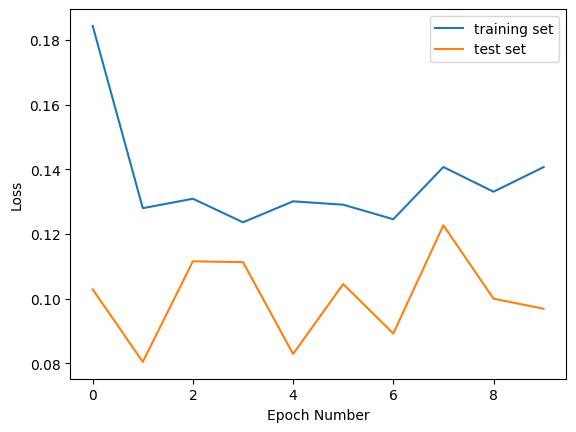

In [16]:
#This is during training the model
plt.xlabel('Epoch Number')
plt.ylabel('Loss')    
plt.plot(training_history.history['loss'],label ='training set')
plt.plot(training_history.history['val_loss'],label ='test set')
plt.legend()

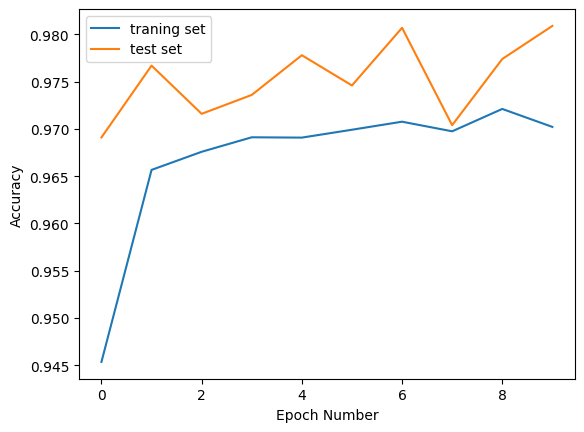

In [17]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label = 'traning set')
plt.plot(training_history.history['val_accuracy'], label = 'test set')
plt.legend()

EVALUATING THE MODEL

**Training set accuracy

In [18]:
#we need to compare accuracy of our model of training and test set because we want our model to do well on both the sets. If not we may get bias or variance problems
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train ) # This loss and accuracy is after the model is trained 

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9845 - loss: 0.0606


In [19]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.06182040646672249
Training accuracy:  0.98458331823349


**Test set accuracy

In [20]:
validation_loss, validation_accuracy = model.evaluate(x_test_normalized,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9775 - loss: 0.1097


In [21]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.09686863422393799
Validation accuracy:  0.98089998960495


Using the trained model to predictions

In [22]:
predictions_one_hot = model.predict([x_test_normalized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [23]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [24]:
#Each prediction consists of 10 probabilities(one for each of 0 to 9). We need to pick the highest probability because that would be the digit that our model confidently predicted.
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,0.000000e+00,6.337244e-21,1.262530e-20,1.175964e-27,7.896991e-24,1.141031e-29,0.000000e+00,1.000000e+00,0.000000e+00,1.296042e-23
1,1.086561e-19,7.451255e-12,1.000000e+00,1.065989e-16,1.157069e-21,2.572185e-22,9.093587e-22,4.658113e-19,5.748545e-16,0.000000e+00
2,2.099968e-35,1.000000e+00,5.578352e-26,0.000000e+00,3.717011e-22,3.942360e-32,2.124353e-23,1.162951e-26,1.894254e-14,0.000000e+00
3,9.999963e-01,1.726687e-21,1.084432e-13,1.032012e-13,3.433026e-12,2.560230e-13,3.712890e-06,1.075857e-14,1.271348e-09,8.301168e-11
4,5.347680e-18,1.819753e-13,2.591261e-11,7.086494e-19,9.999980e-01,1.526816e-13,3.054798e-09,7.763430e-09,2.662887e-10,1.976466e-06
...,...,...,...,...,...,...,...,...,...,...
9995,4.774272e-35,5.087270e-19,1.000000e+00,7.328848e-21,6.684654e-38,0.000000e+00,0.000000e+00,4.331987e-15,1.796163e-20,0.000000e+00
9996,0.000000e+00,0.000000e+00,8.660491e-38,1.000000e+00,0.000000e+00,2.147224e-37,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9997,8.947497e-34,1.667641e-22,2.041357e-17,3.288864e-34,1.000000e+00,2.402424e-34,1.013154e-25,3.731273e-23,3.293855e-15,8.121431e-13
9998,4.730736e-23,1.745132e-25,1.995064e-26,1.524966e-12,1.290075e-21,1.000000e+00,1.209844e-10,1.065423e-26,1.192049e-13,3.023169e-20


In [25]:
predictions = np.argmax(predictions_one_hot, axis = 1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


7


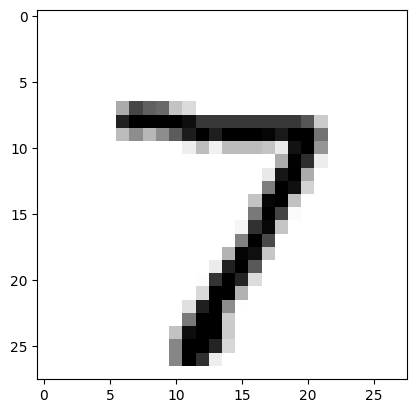

In [26]:
print(predictions[0])
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

We see that our model made correct prediction and recognized the digit 7.Let's some more examples and their corresponding predictions

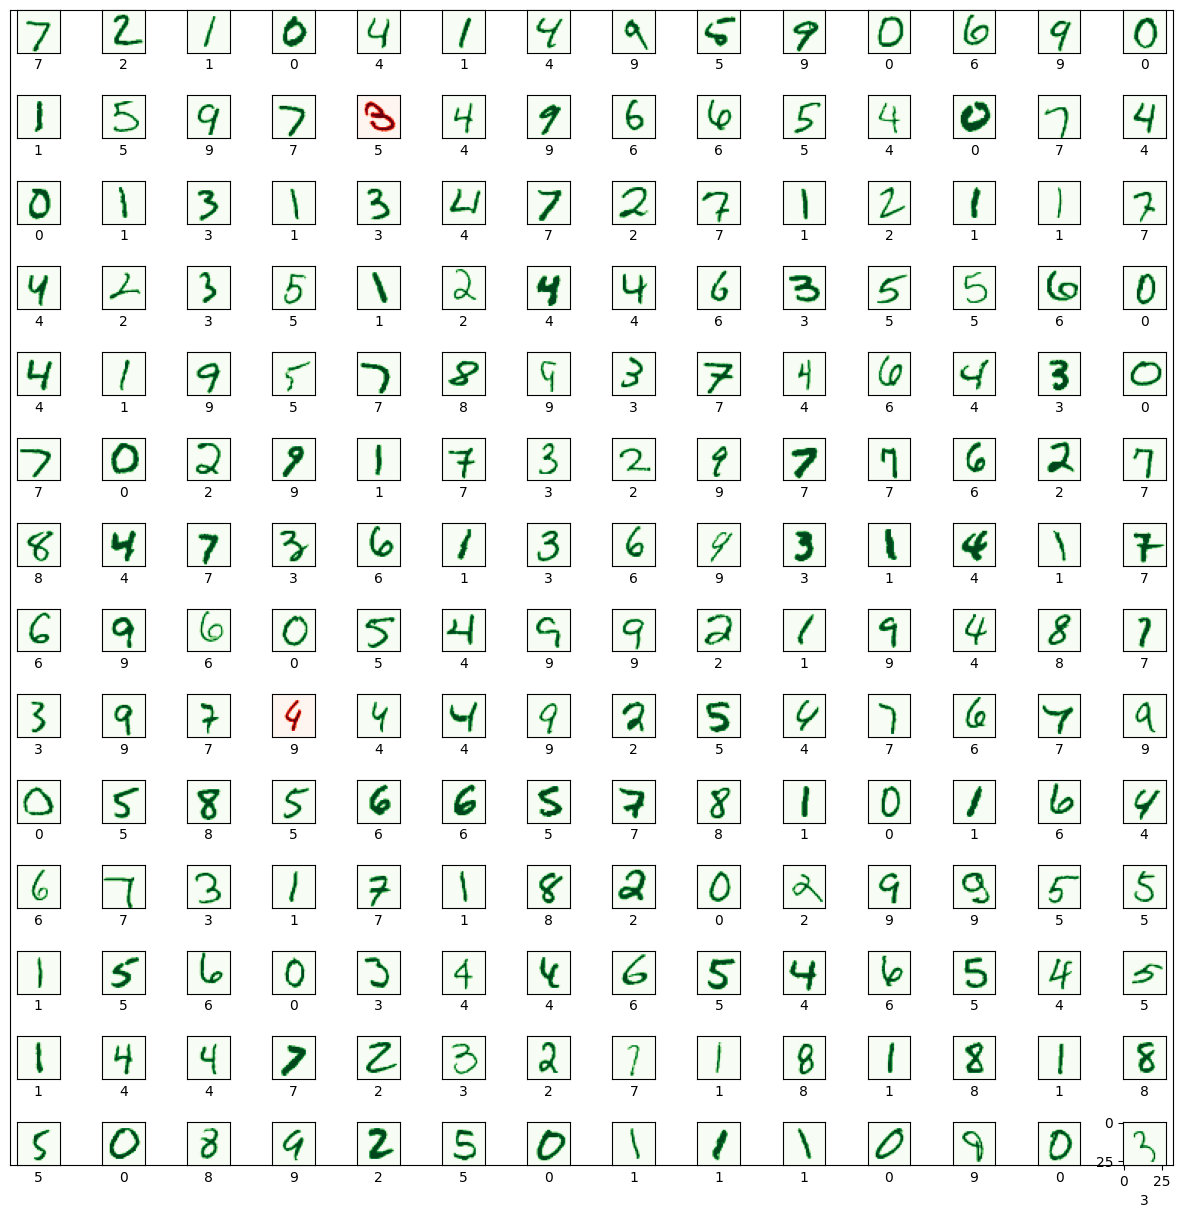

In [27]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)
    
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()